# L4: Word embeddings

In this lab you will explore word embeddings. A **word embedding** is a mapping of words to points in a vector space such that nearby words (points) are similar in terms of their distributional properties. You will use word embedding to find similar words, and evaluate their usefulness in an inference task.

You will use the word vectors that come with [spaCy](http://spacy.io). Note that you will need the &lsquo;large&rsquo; English language model; the &lsquo;small&rsquo; model that you used in previous labs does not include proper word vectors.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/l4

/content/drive/MyDrive/Colab Notebooks/l4


In [3]:
# !python -m spacy download en_core_web_lg 

In [4]:
import spacy

nlp = spacy.load('en_core_web_lg')

Every word in the model&rsquo;s vocabulary comes with a 300-dimensional vector, represented as a NumPy array. The following code cell shows how to access the vector for the word *cheese*:

In [5]:
nlp.vocab['cheese'].vector

array([-5.5252e-01,  1.8894e-01,  6.8737e-01, -1.9789e-01,  7.0575e-02,
        1.0075e+00,  5.1789e-02, -1.5603e-01,  3.1941e-01,  1.1702e+00,
       -4.7248e-01,  4.2867e-01, -4.2025e-01,  2.4803e-01,  6.8194e-01,
       -6.7488e-01,  9.2401e-02,  1.3089e+00, -3.6278e-02,  2.0098e-01,
        7.6005e-01, -6.6718e-02, -7.7794e-02,  2.3844e-01, -2.4351e-01,
       -5.4164e-01, -3.3540e-01,  2.9805e-01,  3.5269e-01, -8.0594e-01,
       -4.3611e-01,  6.1535e-01,  3.4212e-01, -3.3603e-01,  3.3282e-01,
        3.8065e-01,  5.7427e-02,  9.9918e-02,  1.2525e-01,  1.1039e+00,
        3.6678e-02,  3.0490e-01, -1.4942e-01,  3.2912e-01,  2.3300e-01,
        4.3395e-01,  1.5666e-01,  2.2778e-01, -2.5830e-02,  2.4334e-01,
       -5.8136e-02, -1.3486e-01,  2.4521e-01, -3.3459e-01,  4.2839e-01,
       -4.8181e-01,  1.3403e-01,  2.6049e-01,  8.9933e-02, -9.3770e-02,
        3.7672e-01, -2.9558e-02,  4.3841e-01,  6.1212e-01, -2.5720e-01,
       -7.8506e-01,  2.3880e-01,  1.3399e-01, -7.9315e-02,  7.05

## Problem 1: Finding similar words

Your first task is to use the word embeddings to find similar words. More specifically, we ask you to write a function `most_similar` that takes a vector $x$ and returns a list with the 10 most similar entries in spaCy&rsquo;s vocabulary, with similarity being defined by cosine.

**Tip:** spaCy already has a [`most_similar`](https://spacy.io/api/vectors#most_similar) method that you can wrap.

In [6]:
import numpy as np

In [7]:
# TODO: Enter your implementation of `most_similar` here
def most_similar(x):
    queries = np.array([x])
    similar_vocab_entries = nlp.vocab.vectors.most_similar(queries=queries, n=10)[0][0]
    return([nlp.vocab[entry] for entry in similar_vocab_entries])

Test your implementation by running the following code cell, which will print the 10 most similar words for the word *cheese*:

In [8]:
print(' '.join(w.text for w in most_similar(nlp.vocab['cheese'].vector)))

Cheese CHEESE cheese Cheddar cheddar CHEDDAR BACON Bacon bacon cheeses


You should get the following output:

Once you have a working implementation of `most_similar`, use it to think about in what sense the returned words really are &lsquo;similar&rsquo; to the cue word. Try to find examples where the cue word and at least one of the words returned by `most_similar` are in the following semantic relations:

1. synonymy (exchangeable meanings)
2. antonymy (opposite meanings)
3. hyperonymy/hyponymy (more specific/less specific meanings)

Document your examples in the code cell below.

In [9]:
# TODO: Insert code here to generate your examples

# Synonymy
print("Synonymy")
print("#" * 100)
print(' '.join(w.text for w in most_similar(nlp.vocab['concerning'].vector)))
print("#" * 100, "\n")

# Antonymy
print("Antonymy")
print("#" * 100)
print(' '.join(w.text for w in most_similar(nlp.vocab['mom'].vector)))
print("#" * 100, "\n")

# Hyperonymy
print("Hyperonymy")
print("#" * 100)
print(' '.join(w.text for w in most_similar(nlp.vocab['animal'].vector)))
print("#" * 100, "\n")

Synonymy
####################################################################################################
concerning Concerning CONCERNING Regarding regarding REGARDING relating RELATING Relating PERTAINING
#################################################################################################### 

Antonymy
####################################################################################################
MOM Mom MoM mom DAD DaD Dad dad Grandma GRANDMA
#################################################################################################### 

Hyperonymy
####################################################################################################
Animal ANIMAL animal animals ANIMALS Animals pet Pet PET doG
#################################################################################################### 



## Problem 2: Plotting similar words

Your next task is to visualize the word embedding space by a plot. To do so, you will have to reduce the dimensionality of the space from 300 to 2&nbsp;dimensions. One suitable algorithm for this is [T-distributed Stochastic Neighbor Embedding](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) (TSNE), which is implemented in scikit-learn&rsquo;s [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) class.

Write a function `plot_most_similar` that takes a list of words (lexemes) and does the following:

1. For each word in the list, find the most similar words (lexemes) in the spaCy vocabulary.
2. Compute the TSNE transformation of the corresponding vectors to 2&nbsp;dimensions.
3. Produce a scatter plot of the transformed vectors, with the vectors as points and the corresponding word forms as labels.

In [10]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [11]:
# TODO: Write code here to plot the most similar words

def plot_most_similar(words):
    # 1. For each word in the list, find the most similar words (lexemes) in the spaCy vocabulary.
    lexemes = np.array([most_similar(word.vector) for word in words]).flatten()
    
    # 2. Compute the TSNE transformation of the corresponding vectors to 2 dimensions.
    X = [lexeme.vector for lexeme in lexemes]
    X_embedded = TSNE(n_components=2).fit_transform(X)
   
    # 3. Produce a scatter plot of the transformed vectors, with the vectors as points and the corresponding word forms as labels.
    x_coords = X_embedded[:, 0]
    y_coords = X_embedded[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip([lex.text for lex in lexemes], x_coords, y_coords):
        plt.annotate(label, (x,y), xytext=(0, 0), textcoords="offset points", ha="center", va="center")
    plt.title("Visualizing Word Embedding Space")
    plt.show()

Test your code by running the following cell:

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


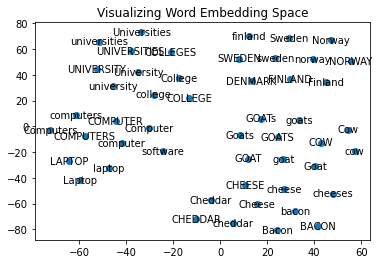

In [12]:
plot_most_similar([nlp.vocab[w] for w in ['cheese', 'goat', 'sweden', 'university', 'computer']])

Take a few minutes to look at your plot. What does it tell you? What does it *not* tell you?

## Problem 3: Analogies

In a **word analogy task** you are given three words $x$, $y$, $z$ and have to predict a word $w$ that has the same semantic relation to $z$ as $y$ has to $x$. One example is *man*, *woman*, *brother*, the expected answer being *sister* (the semantic relation is *male*/*female*).

[Mikolov et al. (2013)](http://www.aclweb.org/anthology/N13-1090) have shown that some types of word analogy tasks can be solved by adding and substracting word vectors in a word embedding: the vector for *sister* is the closest vector (in terms of cosine distance) to the vector *brother* $-$ *man* $+$ *woman*. Your next task is to write a function `fourth` that takes in three words (say *brother*, *man*, *woman*) and predicts the word that completes the analogy (in this case, *sister*).

In [13]:
# TODO: Enter code here to solve the analogy problem
def fourth(x, y, z):
    analogy = most_similar((x.vector - y.vector + z.vector))[0]
    return (analogy)

Test your code by running the following code. You should get *sister*.

In [14]:
fourth(nlp.vocab['brother'], nlp.vocab['man'], nlp.vocab['woman']).text

'SISTER'

In [15]:
fourth(nlp.vocab['Stockholm'], nlp.vocab['Sweden'], nlp.vocab['Germany']).text

'BERLIN'

In [16]:
fourth(nlp.vocab['Swedish'], nlp.vocab['Sweden'], nlp.vocab['France']).text

'French'

In [17]:
fourth(nlp.vocab['better'], nlp.vocab['good'], nlp.vocab['bad']).text

'WORSE'

In [18]:
fourth(nlp.vocab['walked'], nlp.vocab['walk'], nlp.vocab['take']).text

'TOOK'

You should also be able to get the following:

* *Stockholm* $-$ *Sweden* $+$ *Germany* $=$ *Berlin*
* *Swedish* $-$ *Sweden* $+$ *France* $=$ *French*
* *better* $-$ *good* $+$ *bad* $=$ *worse*
* *walked* $-$ *walk* $+$ *take* $=$ *took*

Experiment with other examples to see whether you get the expected output. Provide three examples of analogies for which the model produces the &lsquo;correct&rsquo; answer, and three examples on which the model &lsquo;failed&rsquo;. Based on your theoretical understanding of word embeddings, do you have a hypothesis as to why the model succeeds/fails in completing the analogy? Discuss this question in a short text.

**Examples: Success**

In [19]:
fourth(nlp.vocab['swimming'], nlp.vocab['Swimmer'], nlp.vocab['Skier']).text

'SKIING'

In [20]:
fourth(nlp.vocab['0am'], nlp.vocab['midnight'], nlp.vocab['midday']).text

'0am'

In [21]:
fourth(nlp.vocab['cat'], nlp.vocab['cats'], nlp.vocab['dogs']).text

'Dog'

**Examples: Failure**

In [22]:
fourth(nlp.vocab['son'], nlp.vocab['father'], nlp.vocab['mother']).text

'son'

In [23]:
fourth(nlp.vocab['playstation'], nlp.vocab['sony'], nlp.vocab['microsoft']).text

'MicroSoft'

In [24]:
fourth(nlp.vocab['old'], nlp.vocab['parents'], nlp.vocab['kids']).text

'old'

**Answer:**

In general, the model doesn't succeed that often. It took us a long time to even find 3 working examples. It is way easier to find examples that don't work out. Given that each word is represented as a vector and we know that similar words point in the same direction we think it is easier to find correct analogies if the words x and are similar. If, on the other hand, our 2 base words differ a lot, we expect a higher chance of false predictions.

## Natural language inference dataset

In the second part of this lab, you will be evaluating the usefulness of word embeddings in the context of a natural language inference task. The data for this part is the [SNLI corpus](https://nlp.stanford.edu/projects/snli/), a collection of 570k human-written English image caption pairs manually labeled with the labels *Entailment*, *Contradiction*, and *Neutral*. Consider the following sentence pair as an example:

* Sentence 1: A soccer game with multiple males playing.
* Sentence 2: Some men are playing a sport.

This pair is labeled with *Entailment*, because sentence&nbsp;2 is logically entailed (implied) by sentence&nbsp;1 – if sentence&nbsp;1 is true, then sentence&nbsp;2 is true, too. The following sentence pair, on the other hand, is labeled with *Contradiction*, because both sentences cannot be true at the same time.

* Sentence 1: A black race car starts up in front of a crowd of people.
* Sentence 2: A man is driving down a lonely road.

For detailed information about the corpus, refer to [Bowman et al. (2015)](https://www.aclweb.org/anthology/D15-1075/). For this lab, we load the training portion and the development portion of the dataset.

**Note:** Because the SNLI corpus is rather big, we initially only load a small portion (25,000 samples) of the training data. Once you have working code for Problems&nbsp;4–6, you should set the flag `final` to `True` and re-run all cells with the full dataset.

In [25]:
import bz2
import pandas as pd

final_evaluation = False    # TODO: Set to True for the final evaluation!

with bz2.open('train.jsonl.bz2', 'rt') as source:
    if final_evaluation:
        df_train = pd.read_json(source, lines=True)
    else:
        df_train = pd.read_json(source, lines=True, nrows=25000)
    print('Number of sentence pairs in the training data:', len(df_train))

with bz2.open('dev.jsonl.bz2', 'rt') as source:
    df_dev = pd.read_json(source, lines=True)
    print('Number of sentence pairs in the development data:', len(df_dev))

Number of sentence pairs in the training data: 25000
Number of sentence pairs in the development data: 9842


When you inspect the data frames, you will see that we have preprocessed the sentences and separated tokens by spaces. In the columns `tagged1` and `tagged2`, we have added the part-of-speech tags for every token (as predicted by spaCy), also separated by spaces.

In [26]:
df_dev.head()

,gold_label,sentence1,tags1,sentence2,tags2
0,neutral,Two women are embracing while holding to go pa...,NUM NOUN AUX VERB SCONJ VERB PART VERB NOUN PUNCT,The sisters are hugging goodbye while holding ...,DET NOUN AUX VERB NOUN SCONJ VERB PART VERB NO...
1,entailment,Two women are embracing while holding to go pa...,NUM NOUN AUX VERB SCONJ VERB PART VERB NOUN PUNCT,Two woman are holding packages .,NUM NOUN AUX VERB NOUN PUNCT
2,contradiction,Two women are embracing while holding to go pa...,NUM NOUN AUX VERB SCONJ VERB PART VERB NOUN PUNCT,The men are fighting outside a deli .,DET NOUN AUX VERB ADP DET NOUN PUNCT
3,entailment,"Two young children in blue jerseys , one with ...",NUM ADJ NOUN ADP ADJ NOUN PUNCT NUM ADP DET NO...,Two kids in numbered jerseys wash their hands .,NUM NOUN ADP ADJ NOUN VERB PRON NOUN PUNCT
4,neutral,"Two young children in blue jerseys , one with ...",NUM ADJ NOUN ADP ADJ NOUN PUNCT NUM ADP DET NO...,Two kids at a ballgame wash their hands .,NUM NOUN ADP DET NOUN VERB PRON NOUN PUNCT


## Problem 4: Two simple baselines

Your first task is to establish two simple baselines for the natural language inference task.

### Random baseline

Implement the standard random baseline that generates prediction by sampling from the empirical distribution of the classes in the training data. Write code to evaluate the performance of this classifier on the development data.

In [27]:
# import from sklearn
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import itertools
from sklearn.neural_network import MLPClassifier



In [28]:
# function to predict from a model given train and test data
def predictions(model, datasets):
  return(model.predict(data) for data in datasets)

In [29]:
# TODO: Enter code here to implement the random baseline. Print the classification report.
dummy_class = DummyClassifier().fit(df_train.loc[:, df_train.columns != "gold_label"], df_train["gold_label"])
train_predict, dev_predict = predictions(dummy_class, [df_train.loc[:, df_train.columns != "gold_label"], df_dev.loc[:, df_dev.columns != "gold_label"]])

In [30]:
pd.DataFrame(classification_report(train_predict, df_train["gold_label"], output_dict=True))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,contradiction,entailment,neutral,accuracy,macro avg,weighted avg
precision,0.0,1.000000,0.0,0.33388,0.333333,1.000000
recall,0.0,0.333880,0.0,0.33388,0.111293,0.333880
f1-score,0.0,0.500615,0.0,0.33388,0.166872,0.500615
support,0.0,25000.000000,0.0,0.33388,25000.000000,25000.000000


In [31]:
pd.DataFrame(classification_report(dev_predict, df_dev["gold_label"], output_dict=True))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,contradiction,entailment,neutral,accuracy,macro avg,weighted avg
precision,0.0,1.000000,0.0,0.338244,0.333333,1.000000
recall,0.0,0.338244,0.0,0.338244,0.112748,0.338244
f1-score,0.0,0.505505,0.0,0.338244,0.168502,0.505505
support,0.0,9842.000000,0.0,0.338244,9842.000000,9842.000000


### One-sided baseline

A second obvious baseline for the inference task is to predict the class label of a sentence pair based on the text of only one of the two sentences, just as in a standard document classification task. Put together a simple [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) + [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) pipeline that implements this idea, train it, and evaluate it on the development data. Is it better to base predictions on sentence&nbsp;1 or sentence&nbsp;2? Why should one sentence be more useful than the other?

In [32]:
# TODO: Enter code here to implement the one-sentence baselines. Print the classification reports.
cntvectorizer = CountVectorizer(ngram_range=(1,2), min_df = 4, max_df=0.9)
logreg = LogisticRegression(solver="saga", multi_class="ovr", max_iter=100)

cntlog_pipeline = Pipeline([("cnt_vectorizer", cntvectorizer), ("LogisticRegression", logreg)])

In [33]:
# sentence 1
cntlog_model1 = cntlog_pipeline.fit(df_train["sentence1"], df_train["gold_label"])

train_pred1, test_pred1 = predictions(cntlog_model1, [df_train["sentence1"], df_dev["sentence1"]])

pd.DataFrame(classification_report(df_train["gold_label"], train_pred1, output_dict=True))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


,contradiction,entailment,neutral,accuracy,macro avg,weighted avg
precision,0.336390,0.339281,0.339570,0.33864,0.338414,0.338415
recall,0.264353,0.343956,0.407590,0.33864,0.338633,0.338640
f1-score,0.296052,0.341603,0.370484,0.33864,0.336046,0.336052
support,8326.000000,8347.000000,8327.000000,0.33864,25000.000000,25000.000000


In [34]:
pd.DataFrame(classification_report(df_dev["gold_label"], test_pred1, output_dict=True))

,contradiction,entailment,neutral,accuracy,macro avg,weighted avg
precision,0.329217,0.335819,0.325295,0.329913,0.330110,0.330161
recall,0.260220,0.338240,0.391963,0.329913,0.330141,0.329913
f1-score,0.290680,0.337025,0.355531,0.329913,0.327745,0.327672
support,3278.000000,3329.000000,3235.000000,0.329913,9842.000000,9842.000000


In [35]:
#sentence 2
cntlog_model2 = cntlog_pipeline.fit(df_train["sentence2"], df_train["gold_label"])

train_pred2, test_pred2 = predictions(cntlog_model1, [df_train["sentence2"], df_dev["sentence2"]])

pd.DataFrame(classification_report(df_train["gold_label"], train_pred2, output_dict=True))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


,contradiction,entailment,neutral,accuracy,macro avg,weighted avg
precision,0.757564,0.732895,0.765762,0.75132,0.752074,0.752058
recall,0.733726,0.787948,0.732196,0.75132,0.751290,0.751320
f1-score,0.745455,0.759425,0.748603,0.75132,0.751161,0.751168
support,8326.000000,8347.000000,8327.000000,0.75132,25000.000000,25000.000000


In [36]:
pd.DataFrame(classification_report(df_dev["gold_label"], test_pred2, output_dict=True))

,contradiction,entailment,neutral,accuracy,macro avg,weighted avg
precision,0.596813,0.609481,0.602356,0.602926,0.602883,0.602920
recall,0.605552,0.617903,0.584853,0.602926,0.602770,0.602926
f1-score,0.601151,0.613663,0.593476,0.602926,0.602763,0.602860
support,3278.000000,3329.000000,3235.000000,0.602926,9842.000000,9842.000000


*TODO: Enter your answer to the discussion questions here*

**A** From the accuracies obtained, it seems that basing predictions on sentence 2 yields better results.

## Problem 5: A classifier based on manually engineered features

[Bowman et al., 2015](https://www.aclweb.org/anthology/D15-1075/) evaluate a classifier that uses (among others) **cross-unigram features**. This term is used to refer to pairs of unigrams $(w_1, w_2)$ such that $w_1$ occurs in sentence&nbsp;1, $w_2$ occurs in sentence&nbsp;2, and both have been assigned the same part-of-speech tag.

Your next task is to implement the cross-unigram classifier. To this end, the next cell contains skeleton code for a transformer that you can use as the first component in a classification pipeline. This transformer converts each row of the SNLI data frame into a space-separated string consisting of

* the standard unigrams (of sentence&nbsp;1 or sentence&nbsp;2 – choose whichever performed better in Problem&nbsp;4)
* the cross-unigrams, as described above.

The space-separated string forms a new &lsquo;document&rsquo; that can be passed to a vectorizer in exactly the same way as a standard sentence in Problem&nbsp;4.

In [37]:
from sklearn.base import BaseEstimator, TransformerMixin

class CrossUnigramsTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    # Transform a single row of the dataframe.
    def _transform(self, row):
        # TODO: Replace the following line with your own code
        with nlp.disable_pipes("tagger", "parser", "ner"):
            words_tags1 = [(w.text, t) for w, t in zip(nlp(row[1]), row[2].split()) if w.is_alpha and not w.is_stop]
            words_tags2 = [(w.text, t) for w, t in zip(nlp(row[3]), row[4].split()) if w.is_alpha and not w.is_stop]

        
        # Filter out tags that do not match
        cross_unigrams = [wt1[0] + "_" + wt2[0] for wt1,wt2 in 
                          itertools.product(words_tags1, words_tags2) if wt1[1]==wt2[1]]
        
        # Combine standard unigrams and cross unigrams
        return " ".join([w for w, t in words_tags2] + cross_unigrams)

    def transform(self, X):
        return [self._transform(row) for row in X.itertuples()]

Once you have an implementation of the transformer, extend the pipeline that you built for Problem&nbsp;4, train it, and evaluate it on the development data.

In [38]:
# TODO: Enter code here to implement the cross-unigrams classifier. Print the classification report.
cu_vectorizer = CountVectorizer(ngram_range=(1,1))
cu_logreg = LogisticRegression(solver="saga", multi_class="ovr", max_iter= 100)
cu_transformer = CrossUnigramsTransformer()

cu_pipeline = Pipeline([("cross_unigram", cu_transformer), ("cnt_vectorizer", cu_vectorizer),  ("LogisticRegression", logreg)])
cu_logreg_model = cu_pipeline.fit(df_train.loc[:, df_train.columns !="gold_label"], df_train["gold_label"])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [39]:
cu_train_pred, cu_dev_pred = predictions(cu_logreg_model, [df_train.loc[:, df_train.columns != "gold_label"], df_dev.loc[:, df_dev.columns != "gold_label"]])

In [40]:
pd.DataFrame(classification_report(df_train["gold_label"], cu_train_pred, output_dict=True))

,contradiction,entailment,neutral,accuracy,macro avg,weighted avg
precision,0.944309,0.888133,0.943044,0.92408,0.925162,0.925132
recall,0.930699,0.938780,0.902726,0.92408,0.924068,0.924080
f1-score,0.937455,0.912755,0.922444,0.92408,0.924218,0.924208
support,8326.000000,8347.000000,8327.000000,0.92408,25000.000000,25000.000000


In [41]:
pd.DataFrame(classification_report(df_dev["gold_label"], cu_dev_pred, output_dict=True))

,contradiction,entailment,neutral,accuracy,macro avg,weighted avg
precision,0.659797,0.616895,0.619346,0.631782,0.632013,0.631990
recall,0.654362,0.688795,0.550232,0.631782,0.631130,0.631782
f1-score,0.657068,0.650866,0.582747,0.631782,0.630227,0.630541
support,3278.000000,3329.000000,3235.000000,0.631782,9842.000000,9842.000000


We observe an improvement of 3% compared to the previous iteration of the problem without the cross-unigram.

## Problem 6: A classifier based on word embeddings

Your last task in this lab is to build a classifier for the natural language inference task that uses word embeddings. More specifically, we ask you to implement a vectorizer that represents each sentence as the sum of its word vectors – a representation known as the **continuous bag-of-words**. Thus, given that spaCy&rsquo;s word vectors have 300 dimensions, each sentence will be transformed into a 300-dimensional vector. To represent a sentence pair, the vectorizer should concatenate the vectors for the individual sentences; this yields a 600-dimensional vector. This vector can then be passed to a classifier.

The next code cell contains skeleton code for the vectorizer. You will have to implement two methods: one that maps a single sentence to a vector (of length 300), and one that maps a sentence pair to a vector (of length 600).

In [47]:
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin

class PairedSentenceVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    # Vectorize a single sentence.
    def _transform1(self, sentence):
        # TODO: Replace the following line with your own code
        vect = [nlp.vocab[w].vector for w in sentence.split()]
        return np.sum(vect, axis=0)

    # Vectorize a single row of the dataframe.
    def _transform2(self, row):
        # TODO: Replace the following line with your own code
        ind, sentence1, sentence2 = row
        return np.concatenate((self._transform1(sentence1), self._transform1(sentence2)), axis=0)

    def transform(self, X):
        return np.concatenate(
            [self._transform2(row).reshape(1, -1) for row in X.itertuples()]
        )

Once you have a working implementation, build a pipeline consisting of the new vectorizer and a [multi-layer perceptron classifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html). This more powerful (compared to logistic regression) classifier is called for here because we do not specify features by hand (as we did in Problem&nbsp;5), but want to let the model learn a good representation of the data by itself. Use 3&nbsp;hidden layers, each with size 300. It suffices to train the classifier for 8&nbsp;iterations (epochs).

In [48]:
# TODO: Enter code here to implement the word embeddings classifier. Print the classification report.

train_phrase, dev_phrase = df_train[["sentence1", "sentence2"]], df_dev[["sentence1", "sentence2"]]

cbow_pipeline = Pipeline([("vectorizer", PairedSentenceVectorizer()), ("clf", MLPClassifier(hidden_layer_sizes=(300,300,300), max_iter=8, verbose=True))])

cbow_model = cbow_pipeline.fit(train_phrase, df_train["gold_label"])
training_accuracy = cbow_model.score(train_phrase, df_train["gold_label"])
dev_accuracy = cbow_model.score(dev_phrase, df_dev["gold_label"])
cbow_pred = cbow_model.predict(dev_phrase)

Iteration 1, loss = 1.04980061
Iteration 2, loss = 0.91956541
Iteration 3, loss = 0.87174646
Iteration 4, loss = 0.82190665
Iteration 5, loss = 0.77401738
Iteration 6, loss = 0.72477684
Iteration 7, loss = 0.69592107
Iteration 8, loss = 0.64783213


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [49]:
print("The training accuracy is: ", training_accuracy)
print("The development accuracy is ", dev_accuracy)

pd.DataFrame(classification_report(df_dev["gold_label"], cbow_pred, output_dict=True))

The training accuracy is:  0.76448
The development accuracy is  0.6465149359886202


,contradiction,entailment,neutral,accuracy,macro avg,weighted avg
precision,0.689237,0.624876,0.635610,0.646515,0.649908,0.649840
recall,0.589994,0.754581,0.592581,0.646515,0.645719,0.646515
f1-score,0.635766,0.683630,0.613342,0.646515,0.644246,0.644585
support,3278.000000,3329.000000,3235.000000,0.646515,9842.000000,9842.000000


## Problem 7: Final evaluation

Once you have working code for all problems, re-run Problems&nbsp;4–6 with the full training data. This will take quite a while (expect approximately 1&;nbsp;hour on Colab). **Make sure to not overwrite your previous results.** What are your results on the full data? How do they differ from the results that you obtained for the smaller training data? How do you interpret this? Summarize your findings in a short text.

In [50]:
# Copy of previous code to load all the data
final_evaluation = True    # TODO: Set to True for the final evaluation!

with bz2.open('train.jsonl.bz2', 'rt') as source:
    if final_evaluation:
        df_train = pd.read_json(source, lines=True)
    else:
        df_train = pd.read_json(source, lines=True, nrows=25000)
    print('Number of sentence pairs in the training data:', len(df_train))

with bz2.open('dev.jsonl.bz2', 'rt') as source:
    df_dev = pd.read_json(source, lines=True)
    print('Number of sentence pairs in the development data:', len(df_dev))

Number of sentence pairs in the training data: 549367
Number of sentence pairs in the development data: 9842


**Random Baseline**

In [51]:
# TODO: Enter your code for the full experiments here
dummy_class = DummyClassifier().fit(df_train.loc[:, df_train.columns != "gold_label"], df_train["gold_label"])
train_predict, dev_predict = predictions(dummy_class, [df_train.loc[:, df_train.columns != "gold_label"], df_dev.loc[:, df_dev.columns != "gold_label"]])

In [52]:
pd.DataFrame(classification_report(train_predict, df_train["gold_label"], output_dict=True))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,contradiction,entailment,neutral,accuracy,macro avg,weighted avg
precision,0.0,1.000000,0.0,0.333868,0.333333,1.000000
recall,0.0,0.333868,0.0,0.333868,0.111289,0.333868
f1-score,0.0,0.500601,0.0,0.333868,0.166867,0.500601
support,0.0,549367.000000,0.0,0.333868,549367.000000,549367.000000


In [53]:
pd.DataFrame(classification_report(dev_predict, df_dev["gold_label"], output_dict=True))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,contradiction,entailment,neutral,accuracy,macro avg,weighted avg
precision,0.0,1.000000,0.0,0.338244,0.333333,1.000000
recall,0.0,0.338244,0.0,0.338244,0.112748,0.338244
f1-score,0.0,0.505505,0.0,0.338244,0.168502,0.505505
support,0.0,9842.000000,0.0,0.338244,9842.000000,9842.000000


**One sided baseline**

In [54]:
# TODO: Enter code here to implement the one-sentence baselines. Print the classification reports.
cntvectorizer = CountVectorizer(ngram_range=(1,2), min_df = 4, max_df=0.9)
logreg = LogisticRegression(solver="saga", multi_class="ovr", max_iter=100)

cntlog_pipeline = Pipeline([("cnt_vectorizer", cntvectorizer), ("LogisticRegression", logreg)])

In [55]:
# sentence 1
cntlog_model1 = cntlog_pipeline.fit(df_train["sentence1"], df_train["gold_label"])

train_pred1, test_pred1 = predictions(cntlog_model1, [df_train["sentence1"], df_dev["sentence1"]])

pd.DataFrame(classification_report(df_train["gold_label"], train_pred1, output_dict=True))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


,contradiction,entailment,neutral,accuracy,macro avg,weighted avg
precision,0.337035,0.339024,0.338615,0.338359,0.338224,0.338224
recall,0.256978,0.361097,0.397108,0.338359,0.338394,0.338359
f1-score,0.291612,0.349712,0.365536,0.338359,0.335620,0.335603
support,183187.000000,183416.000000,182764.000000,0.338359,549367.000000,549367.000000


In [56]:
pd.DataFrame(classification_report(df_dev["gold_label"], test_pred1, output_dict=True))

,contradiction,entailment,neutral,accuracy,macro avg,weighted avg
precision,0.335438,0.342477,0.330064,0.335907,0.335993,0.336053
recall,0.259304,0.363773,0.384853,0.335907,0.335977,0.335907
f1-score,0.292498,0.352804,0.355359,0.335907,0.333554,0.333558
support,3278.000000,3329.000000,3235.000000,0.335907,9842.000000,9842.000000


In [57]:
#sentence 2
cntlog_model2 = cntlog_pipeline.fit(df_train["sentence2"], df_train["gold_label"])

train_pred2, test_pred2 = predictions(cntlog_model1, [df_train["sentence2"], df_dev["sentence2"]])

pd.DataFrame(classification_report(df_train["gold_label"], train_pred2, output_dict=True))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


,contradiction,entailment,neutral,accuracy,macro avg,weighted avg
precision,0.736777,0.708316,0.751960,0.731107,0.732351,0.732326
recall,0.719265,0.773422,0.700510,0.731107,0.731066,0.731107
f1-score,0.727916,0.739439,0.725324,0.731107,0.730893,0.730901
support,183187.000000,183416.000000,182764.000000,0.731107,549367.000000,549367.000000


In [58]:
pd.DataFrame(classification_report(df_dev["gold_label"], test_pred2, output_dict=True))

,contradiction,entailment,neutral,accuracy,macro avg,weighted avg
precision,0.666871,0.674068,0.680013,0.673542,0.673651,0.673625
recall,0.662599,0.711325,0.645750,0.673542,0.673224,0.673542
f1-score,0.664728,0.692195,0.662439,0.673542,0.673121,0.673266
support,3278.000000,3329.000000,3235.000000,0.673542,9842.000000,9842.000000


**A classifier based on manually engineered features**

In [59]:
cu_vectorizer = CountVectorizer(ngram_range=(1,1))
cu_logreg = LogisticRegression(solver="saga", multi_class="ovr", max_iter= 100)
cu_transformer = CrossUnigramsTransformer()

cu_pipeline = Pipeline([("cross_unigram", cu_transformer), ("cnt_vectorizer", cu_vectorizer),  ("LogisticRegression", logreg)])
cu_logreg_model = cu_pipeline.fit(df_train.loc[:, df_train.columns !="gold_label"], df_train["gold_label"])

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


In [60]:
cu_train_pred, cu_dev_pred = predictions(cu_logreg_model, [df_train.loc[:, df_train.columns != "gold_label"], df_dev.loc[:, df_dev.columns != "gold_label"]])

In [62]:
pd.DataFrame(classification_report(df_train["gold_label"], cu_train_pred, output_dict=True))

,contradiction,entailment,neutral,accuracy,macro avg,weighted avg
precision,0.877254,0.797701,0.867547,0.844332,0.847501,0.847465
recall,0.845950,0.900919,0.785921,0.844332,0.844263,0.844332
f1-score,0.861318,0.846174,0.824719,0.844332,0.844070,0.844086
support,183187.000000,183416.000000,182764.000000,0.844332,549367.000000,549367.000000


In [63]:
pd.DataFrame(classification_report(df_dev["gold_label"], cu_dev_pred, output_dict=True))

,contradiction,entailment,neutral,accuracy,macro avg,weighted avg
precision,0.761410,0.711223,0.730170,0.732981,0.734268,0.734166
recall,0.737950,0.807149,0.651623,0.732981,0.732241,0.732981
f1-score,0.749497,0.756156,0.688664,0.732981,0.731439,0.731754
support,3278.000000,3329.000000,3235.000000,0.732981,9842.000000,9842.000000


**A classifier based on word embeddings**

In [64]:
train_phrase, dev_phrase = df_train[["sentence1", "sentence2"]], df_dev[["sentence1", "sentence2"]]

cbow_pipeline = Pipeline([("vectorizer", PairedSentenceVectorizer()), ("clf", MLPClassifier(hidden_layer_sizes=(300,300,300), max_iter=8, verbose=True))])

cbow_model = cbow_pipeline.fit(train_phrase, df_train["gold_label"])
training_accuracy = cbow_model.score(train_phrase, df_train["gold_label"])
dev_accuracy = cbow_model.score(dev_phrase, df_dev["gold_label"])
cbow_pred = cbow_model.predict(dev_phrase)

Iteration 1, loss = 0.79740871
Iteration 2, loss = 0.68328956
Iteration 3, loss = 0.64326345
Iteration 4, loss = 0.61644263
Iteration 5, loss = 0.59521074
Iteration 6, loss = 0.57762891
Iteration 7, loss = 0.56330906
Iteration 8, loss = 0.55010570


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (8) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [65]:
print("The training accuracy is: ", training_accuracy)
print("The development accuracy is ", dev_accuracy)

pd.DataFrame(classification_report(df_dev["gold_label"], cbow_pred, output_dict=True))

The training accuracy is:  0.7881798506280865
The development accuracy is  0.7653932127616339


,contradiction,entailment,neutral,accuracy,macro avg,weighted avg
precision,0.833865,0.768300,0.706663,0.765393,0.769609,0.769877
recall,0.718121,0.819766,0.757342,0.765393,0.765076,0.765393
f1-score,0.771677,0.793199,0.731125,0.765393,0.765333,0.765627
support,3278.000000,3329.000000,3235.000000,0.765393,9842.000000,9842.000000


*TODO: Insert your discussion of the experimental results here*

<div class="alert alert-info">
    Please read the section ‘General information’ on the ‘Labs’ page of the course website before submitting this notebook!
</div>